## **Example of calculations of SNR for a range of the boson mass*

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import healpy
import h5py
import os

# Conditions

In [2]:
Tobs=3.15136e+7 #en s
z=4.222e9 #redshift in Pc

# Initial parameters

In [3]:
#Calculation of chi

In [4]:
G=6.6740e-11
c=299792458.0
p=5
t_rot=62e-6 #time or rotation for M=1msun
mass_BH=[10**5,10**6,10**7,10**8,10**9]
print(mass_BH)
chi=[]
chi2=[]

def rg(M):
    return (G*(M*2*10**30))/c**2
            
def J(M):
    return M*2*10**30*(2*np.pi*rg(M)**2)/(t_rot*M)

            
def a(M):
    return J(M)/(M*2*10**30*c)

for i in range(p):
    chi.append((a(mass_BH[i])*c**2)/(G*mass_BH[i]*2*10**30))
    #chi2.append((J(mass_BH[i]))/(mass_BH[i]*2*10**30*c*rg(mass_BH[i])))

print(chi)
print(len(mass_BH))
print(rg(mass_BH[1]))
print(mass_BH[0])

[100000, 1000000, 10000000, 100000000, 1000000000]
[0.5020445628910765, 0.5020445628910766, 0.5020445628910762, 0.5020445628910762, 0.5020445628910766]
5
1485165294.82037
100000


In [5]:
#d_source=np.linspace(z,10*z,p) #enPc
#d_source=[8e3,2e7] #enPc
d_source=8*10**np.arange(3,8,1)
alpha_best_dfixed=[]
alpha_best_mfixed=[]
alpha_bestd_tot=[]
alpha_bestm_tot=[]

#print(len(alphas))
#print(len(d_source))
#print(d_source)

# Search of best Boson 

In [6]:
def get_peak(a, lgw=2, **kwargs): 
    cloud = gwaxion.BosonCloud.from_parameters(1, 1, 0, alpha=a, evolve_params={'y_0': 1E-8}, **kwargs) 
    return cloud.gw(lgw).h0r, cloud.gw(lgw).f

In [7]:
import gwaxion
import multiprocessing
from functools import partial

alphas = np.arange(0.01, 0.25, 0.001)

for d in range (p):
    distance =  d_source[d]* gwaxion.PC_SI
    for b in range (p):
        bh = gwaxion.BlackHole(mass=mass_BH[b], chi=chi[b], msun=True)
        # collect peak values
        pool = multiprocessing.Pool(8)
        h0r_fs = pool.map(partial(get_peak, m_bh=bh.mass_msun, chi_bh=bh.chi), alphas)
        h0rs_num, fgws_num = np.array(h0r_fs).T
        
        # h0rs are the amplitudes 1m away from the source, so rescale by actual distance
        h0s_num = h0rs_num / distance
    
        best = max(zip(h0s_num, alphas))
        alpha_best_dfixed.append(best[1])
        #print(alpha_best_mfixed)

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:268: RuntimeWarning: invalid value encountered in sqrt
  self.rm_natural = 1 - np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3.9/site-packages/gwaxion/physics.py:267: RuntimeWarning: invalid value encountered in sqrt
  self.rp_natural = 1 + np.sqrt(1 - self.chi**2)
/local/home/dd274198/Documents/lisaenv/lib/python3

In [8]:
alpha_bestd_tot=[]
for i in range(p):
    alpha_bestd_tot.append([])

for i in range(p):
     alpha_bestd_tot[i]= alpha_best_dfixed[0+p*i:(i+1)*p]

#print(len(alpha_bestd_tot[0]))
print(alpha_bestd_tot[0])
#print(alpha_bestd_tot)


[0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992]


# Superrad

In [9]:
from superrad import ultralight_boson as ub
wf_d=[]
wf_m=[]
wf_dtot=[]
wf_mtot=[]


for b in range(p):
    a=alpha_bestd_tot[0][b]
    m_b=((a*6.62607e-34*c)/((2*np.pi*rg(mass_BH[b])))*(1/1.6e-19))
    chi_b=chi[b]
    bc= ub.UltralightBoson(spin=0, model="non-relativistic")
    wf_dtot.append(bc.make_waveform(mass_BH[b], 
                               0.5, 
                               mu=m_b, 
                               units="physical"))
        


In [10]:
orbit_file_name='/local/home/dd274198/Documents/lisaenv/keplerian-orbits-1-0-2.h5'
with h5py.File(orbit_file_name, 'r') as fi:
    orbit_t0 = fi.attrs['t0']
    duration=fi.attrs['tduration']
    #print(fi.attrs.keys())
    print(duration)

Tobs=3.0e7
dt=25
N=int(Tobs/dt)
t = orbit_t0 + np.arange(0,1.2*Tobs,dt)
N_pad=len(t)-N
print(len(t))   
print(N) 
print(N*dt)
print(N_pad)

31536000.0
1440000
1200000
30000000
240000


In [11]:
sec_hour = 3600.0
sec_day=sec_hour*24
sec_year=sec_day*365
t_freq = np.arange(0,10**9*sec_year,10**2*sec_year)
print(len(t))
print(len(t_freq))


1440000
10000000


# GWresponse

In [12]:
import os
from lisagwresponse import ReadStrain
LINKS = [12, 23, 31, 13, 32, 21]

import pytdi
import pytdi.michelson
from pytdi.michelson import X2, Y2, Z2
from pytdi import Data
skipped = int(1e4)

strain_file='gwresponse_file_cd1705cop.h5'
tab_X2gw_d = []
    
for d in range(p):
    for b in range(p):
        thetaObs = np.pi/4 #Observing angle w.r.t. spin axis
        phi=wf_dtot[b].phase_gw(t)
        #hp,hx,delta = wf_m[b][d].strain_amp(t_freq,thetaObs,d_source[b]*10**(-6))
        hp0_f,hx0_f,delta=wf_dtot[b].strain_amp(t,thetaObs,d_source[d]*10**(-6))
        hp_f,hx_f=hp0_f*np.cos(phi),hx0_f*np.sin(phi)
        #fgw = wf_m[b][d].freq_gw(t_freq)
        
        if os.path.exists(strain_file):
            os.remove(strain_file)
        rs=ReadStrain(t,hp_f,hx_f,strain_interp_order=5,orbits=orbit_file_name, 
        orbit_interp_order=2, dt=dt, size=N,gw_beta=np.pi / 2, gw_lambda=0,t0=orbit_t0+10)
        response=rs.compute_gw_response(rs.t,LINKS)
        rs.write(path=strain_file)
        data = Data.from_gws(strain_file, orbit_file_name)
        built_gw_X2 = X2.build(**data.args)
        tab_X2gw_d.append(built_gw_X2(data.measurements))
  
    

In [13]:
tab_X2gw_dtot = []
for i in range(p):
    tab_X2gw_dtot.append([])

for i in range(p):
    tab_X2gw_dtot[i]=tab_X2gw_d[0+p*i:(i+1)*p]
#print((tab_X2gw_dtot)[0])    
#print((tab_X2gw_dtot)[0])
print(len((tab_X2gw_dtot)[0]))
print(len(tab_X2gw_dtot[0][0]))
print((tab_X2gw_dtot)[4][4])
#print(((tab_X2gw_dtot[0][1])))
#print(((tab_X2gw_dtot[0][0])))

5
1200000
[ 2.58814115e-25 -2.26593892e-25 -1.73436107e-25 ... -3.16371752e-27
  6.73344582e-27 -1.77539623e-26]


In [ ]:
#fenêtrage

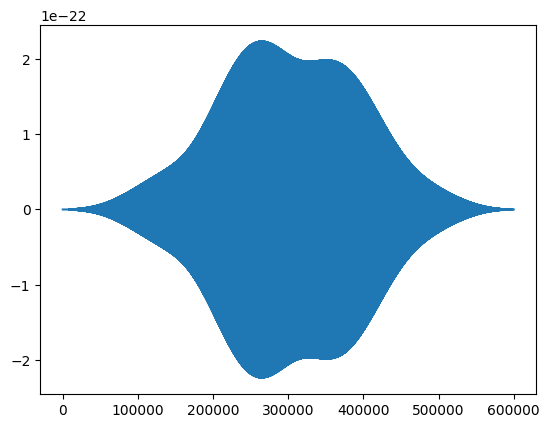

In [21]:
def wind(x):
    window=np.blackman(len(x))
    return window*x

plt.plot(wind(tab_X2gw_d[0]))



In [ ]:
#Fenêtrage puis Zero-padding

In [42]:
def Wdata(x):
    window=np.blackman(len(x))
    return x*window

In [43]:
L_pad=[0]*int(N_pad)
wtab_X2gw_d=[]
Wtab_X2gw_d=[]

for i in range(p*p):
    wtab_X2gw_d.append([])
    wtab_X2gw_d[i]=Wdata(tab_X2gw_d[i])

for i in range(p*p):    
    Wtab_X2gw_d.append(list(wtab_X2gw_d[i]))
    Wtab_X2gw_d[i].extend(L_pad)
    
Wtab_X2gw_dtot = []
for i in range(p):
    Wtab_X2gw_dtot.append([])
    Wtab_X2gw_dtot[i]=Wtab_X2gw_d[0+p*i:(i+1)*p]

In [14]:
L_pad=[0]*int(N_pad)
ltab_X2gw_d=[]

for i in range(p*p):
    ltab_X2gw_d.append(list(tab_X2gw_d[i]))
    ltab_X2gw_d[i].extend(L_pad)
    
print(len(ltab_X2gw_d[0]))

1440000


In [35]:
ltab_X2gw_dtot = []
for i in range(p):
    ltab_X2gw_dtot.append([])

for i in range(p):
    ltab_X2gw_dtot[i]=ltab_X2gw_d[0+p*i:(i+1)*p]


In [17]:
#fonction Périodogramme_bis

In [44]:
def Norm_coef(x):
    window=np.blackman(len(x))
    return np.sum(window**2)

In [47]:
def Pd_num_bis(x_i,x_pad,dt):
    N_w=Norm_coef(x_i)
    return dt*(2/N_w)*(np.abs(np.fft.rfft(x_pad)))

In [15]:
#fonction Périodogramme

In [38]:
def Pd_num(x,dt):
    #window=np.blackman(len(x))
    window=np.blackman(N)
    N_w=np.sum(window**2)
    return dt*2/N_w*(np.abs(np.fft.rfft(x*window)))**2

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True

f= np.fft.rfftfreq(int(N+N_pad),d=dt)

PSD_sciRD_X2usb = []
Pd_X2n_d = []
Pd_X2n_dtot = []
Sn_theo_tot=[]

s=p*p
for i in range(s):
    ## Noise level in the Science Requirement Document
    PSD_sciRD_X2usb.append(get_noise_model("SciRDv1",f[1:]).psd(option='X',tdi2=True))
    Pd_X2n_d.append(Pd_num(ltab_X2gw_d[i][1:],dt))
    #Pd_X2n_d.append(Pd_num_bis(tab_X2gw_d[i][1:],Wtab_X2gw_d[i][1:],dt))

for i in range(p):
    Pd_X2n_dtot.append([])
    Pd_X2n_dtot[i]=Pd_X2n_d[0+p*i:(i+1)*p]
    

In [96]:
print(len(Pd_X2n_d[0]))

720000


In [39]:
#SNR

[[873.0168955953064, 9351.583210514942, 4332.311600225984, 134.64455329588668, 78.2961836135373], [87.30168955953066, 935.1583210514939, 433.2311600225984, 13.464455329588588, 7.829618361354603], [8.730168955953065, 93.5158321051494, 43.32311600225985, 1.3464455329588685, 0.7829618361355232], [0.8730168955953066, 9.35158321051494, 4.332311600225984, 0.134644553295888, 0.07829618361355367], [0.08730168955953067, 0.9351583210514943, 0.4332311600225985, 0.013464455329588761, 0.007829618361355173]]


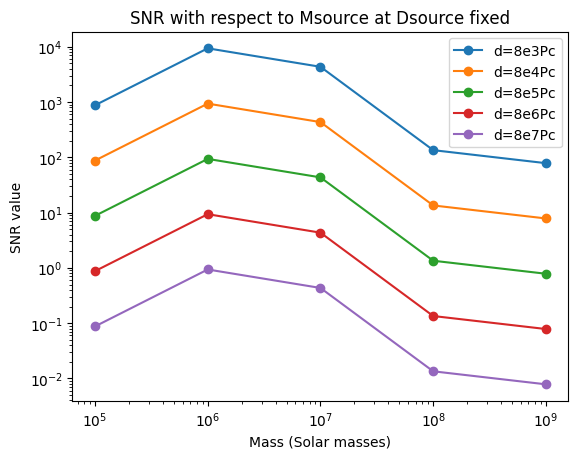

In [69]:
SNRc_X2_d = []
SNR_X2_d = []
SNRc_X2_dtot = []
SNRc_X2_m = []
SNRc_X2_mtot = []
SNR_X2_dtot = []

fmax=1/(2*dt)
fmin=1/Tobs
df=fmax-fmin
K=int(N/2)

def SNR_carre(P_d,Sn_f):
    
    return 4*np.real(np.sum((P_d/(Sn_f))))*(1/Tobs)

for i in range(s):
    #SNRc_X2_d.append(SNR_carre((np.abs(dt*np.fft.rfft(tab_X2gw_d[i][1:])))**2,PSD_sciRD_X2usb[i][:-33547]))
    SNR_X2_d.append(np.sqrt(SNR_carre((dt*np.abs(np.fft.rfft(ltab_X2gw_d[i][1:])))**2,PSD_sciRD_X2usb[i][:])))
for i in range(p):
    SNRc_X2_dtot.append(SNRc_X2_d)
    SNRc_X2_dtot[i]=SNRc_X2_d[0+p*i:(i+1)*p]
    SNR_X2_dtot.append(np.sqrt(SNR_X2_d))
    SNR_X2_dtot[i]=SNR_X2_d[0+p*i:(i+1)*p]
    
plt.figure()
plt.loglog(mass_BH,SNR_X2_dtot[0], marker='o', label='d=8e3Pc')
plt.loglog(mass_BH,SNR_X2_dtot[1], marker='o', label='d=8e4Pc')
plt.loglog(mass_BH,SNR_X2_dtot[2], marker='o', label='d=8e5Pc')
plt.loglog(mass_BH,SNR_X2_dtot[3], marker='o', label='d=8e6Pc')
plt.loglog(mass_BH,SNR_X2_dtot[4], marker='o', label='d=8e7Pc')
plt.title('SNR with respect to Msource at Dsource fixed')
plt.legend()
plt.ylabel('SNR value')
plt.xlabel('Mass (Solar masses)')

print(SNR_X2_dtot)

In [6]:
plt.rcParams['text.usetex']=True
import matplotlib
grid=np.zeros((p,p))


VY = mass_BH
VX = 10**np.arange(3,8,1)

X,Y = np.meshgrid(VX, VY)
print(len(X))

for i in range(p):
    for j in range(p):
        grid[i][j]=SNR_X2_dtot[j][i]
        
        
fig, ax = plt.subplots()
plot = ax.pcolor(np.log10(X), np.log10(Y),Normalize, grid,vmin=abs(grid).min(), vmax=abs(grid).max())
#cmap=matplotlib.cm.RdBu
cb = fig.colorbar(plot, ax=plt.semilogx(ax))


NameError: name 'p' is not defined

# Plots

In [22]:
#Response

<Figure size 1500x1000 with 0 Axes>

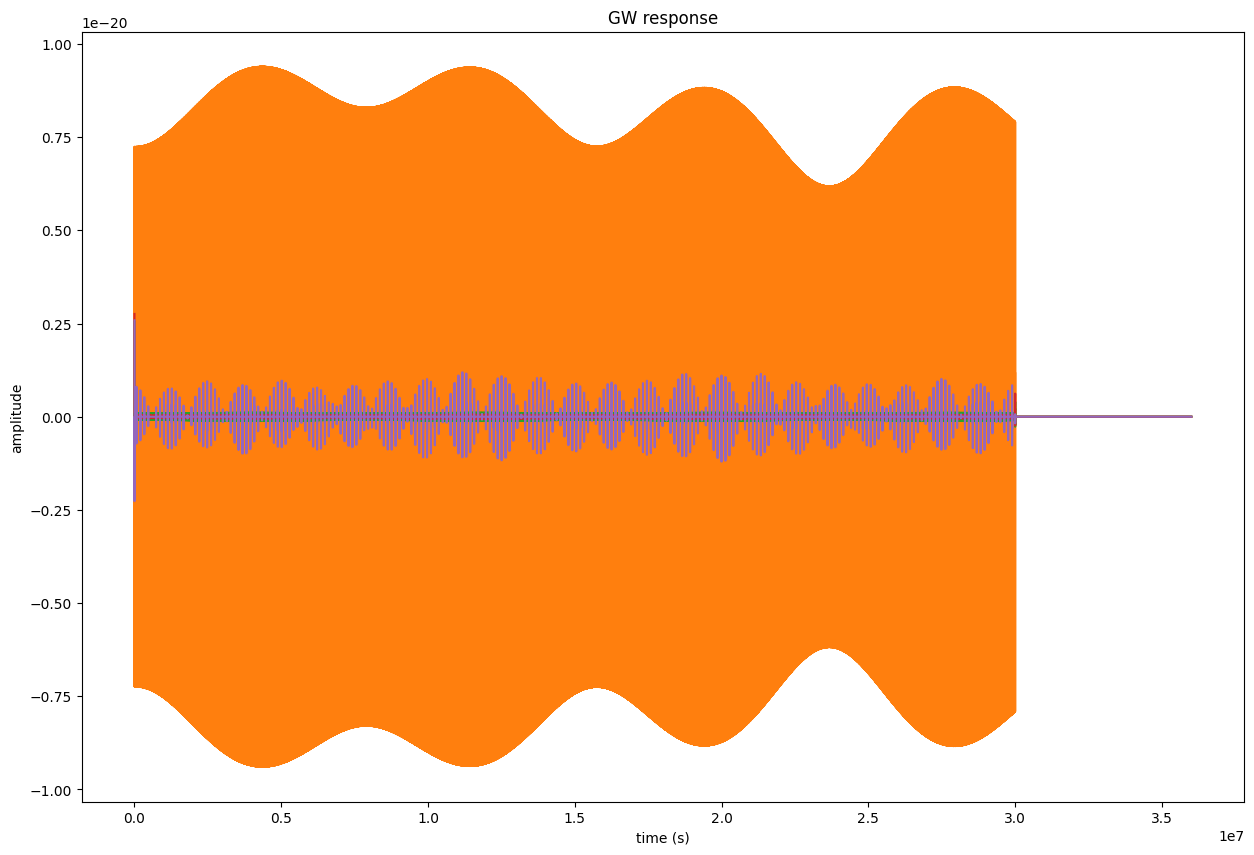

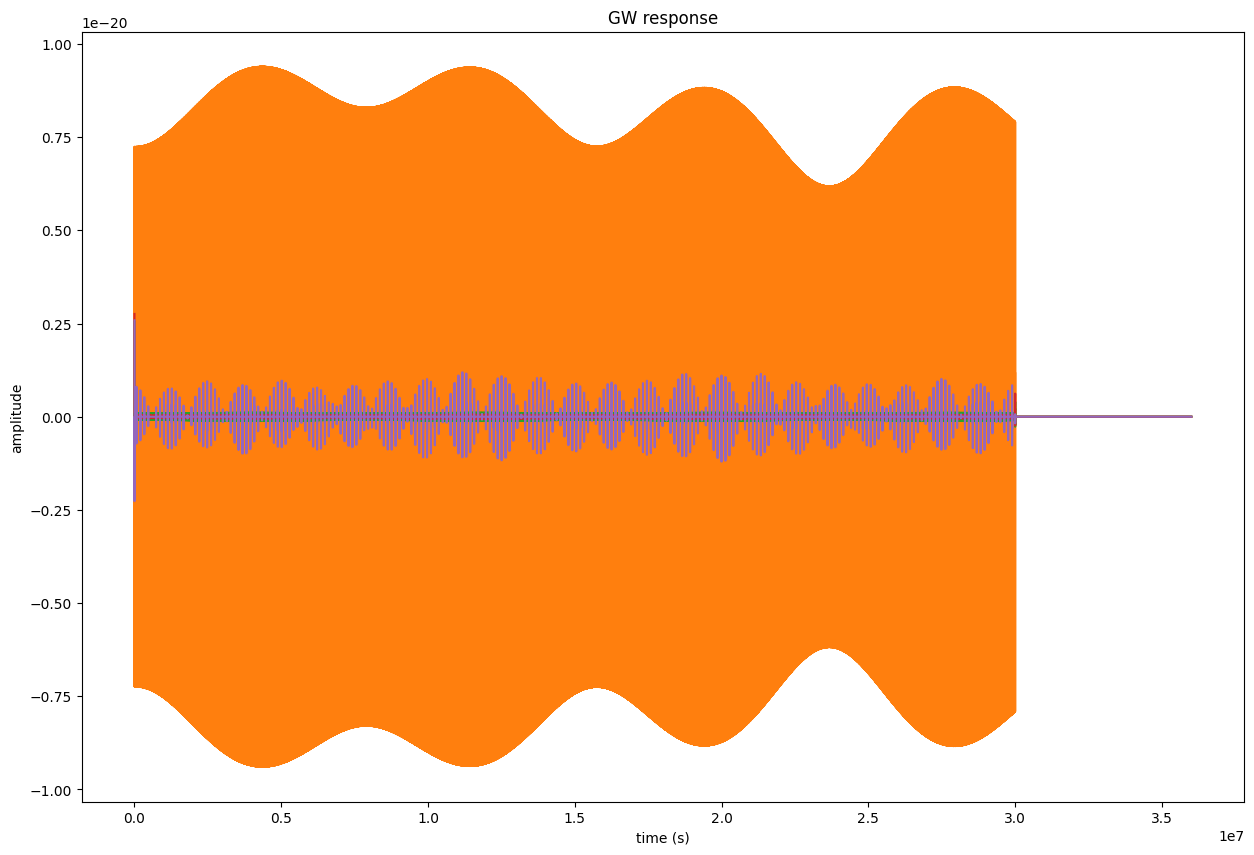

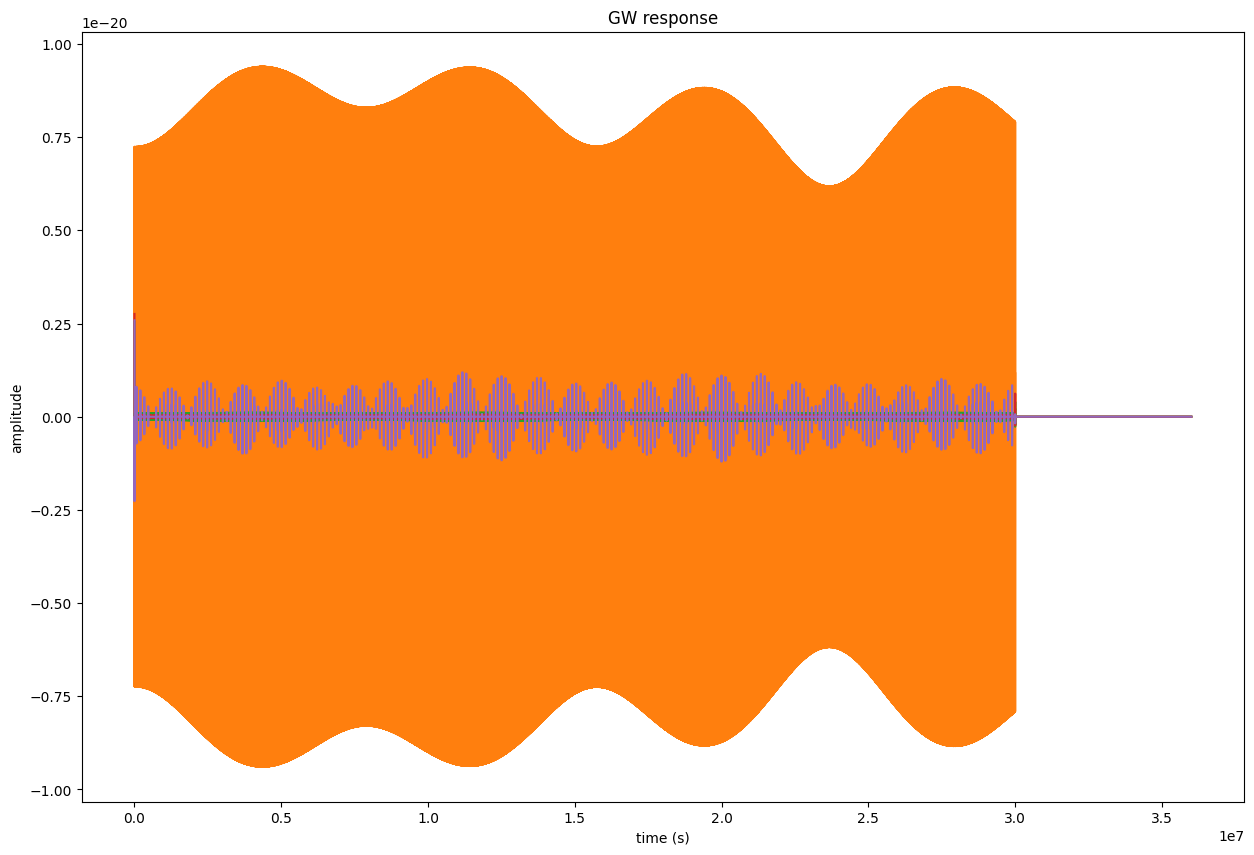

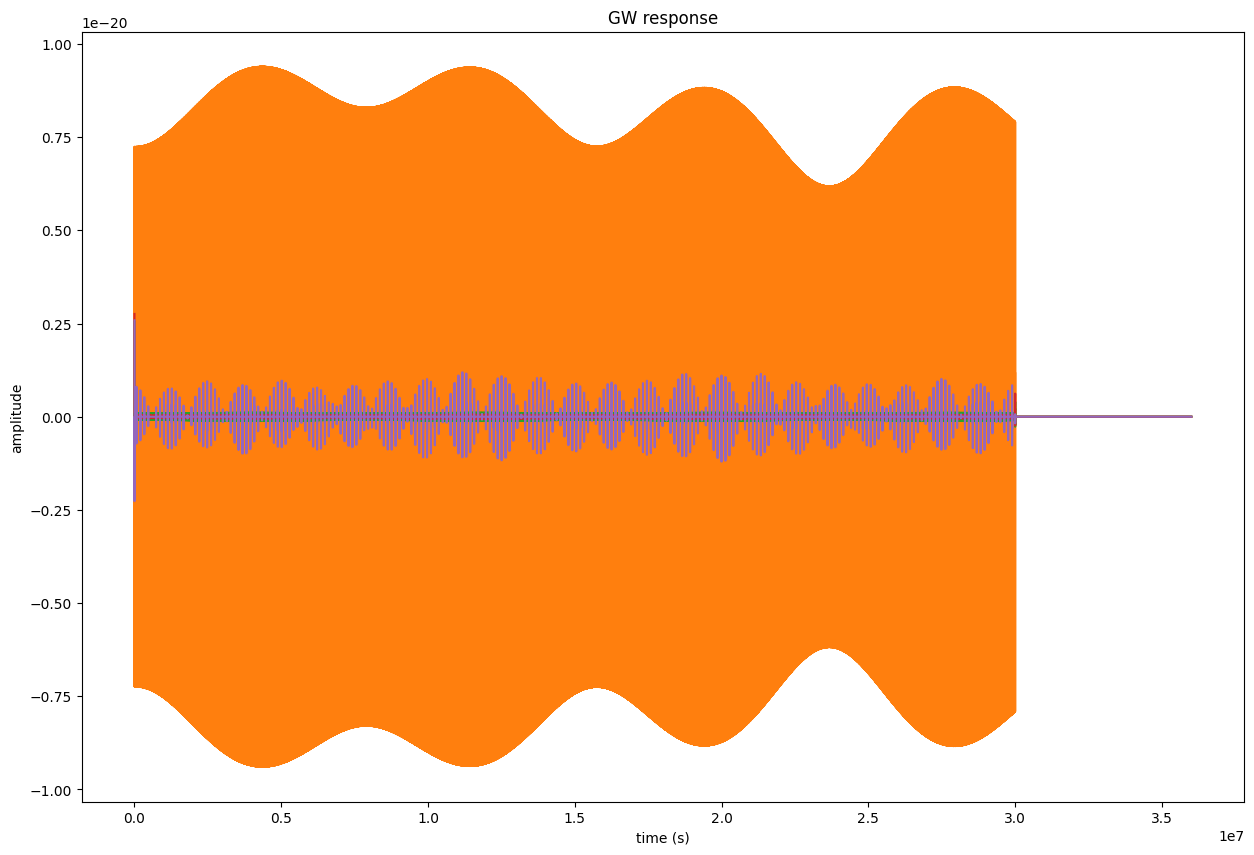

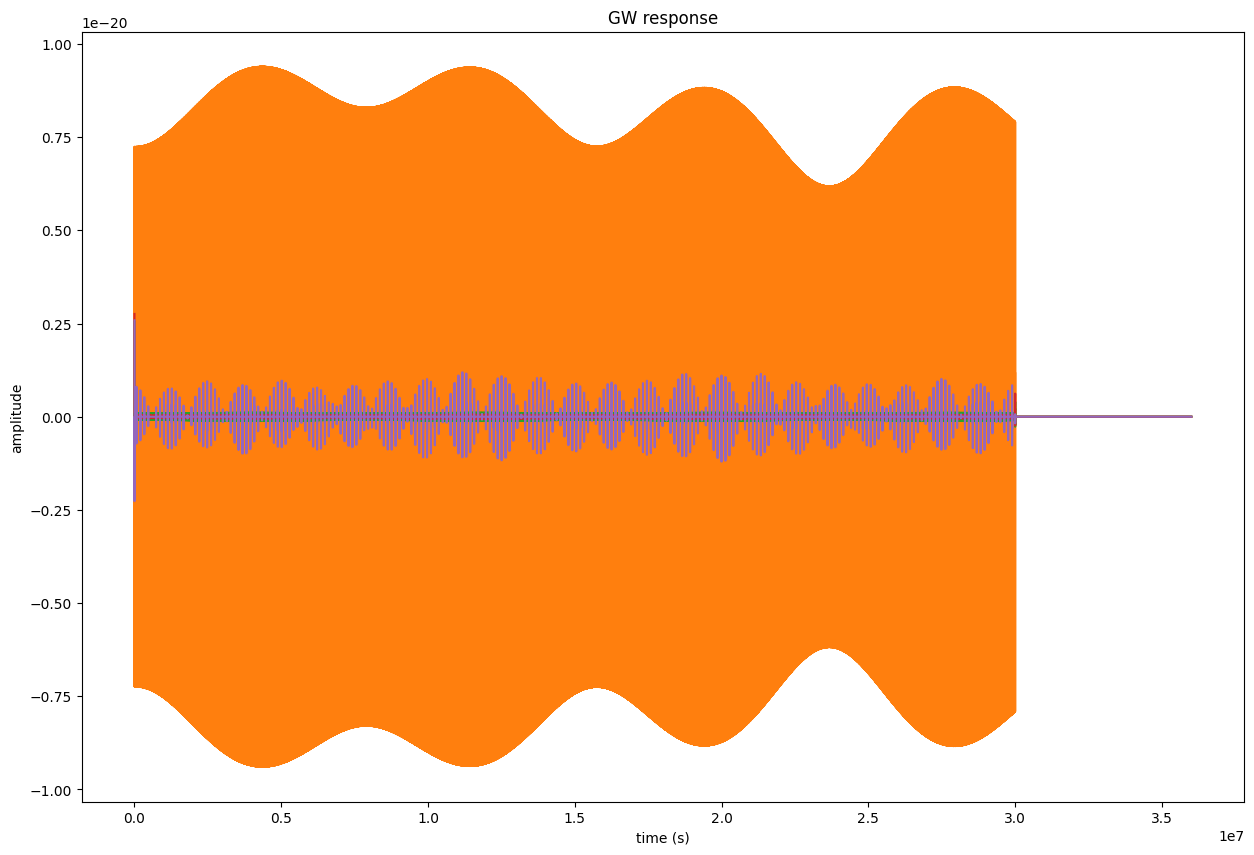

In [23]:

plt.figure(figsize=(15,10))

for d in range(p):
    plt.figure(figsize=(15,10))
    for i in range(1):
        #plt.plot(t[100000:-100000], tab_X2gw_dtot[d][b][100000:-100000])
        plt.plot(t[:], ltab_X2gw_d[i])
    
    plt.title('GW response')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')        
    plt.show()
    

In [53]:
#PSD

In [54]:
import scipy.signal as si


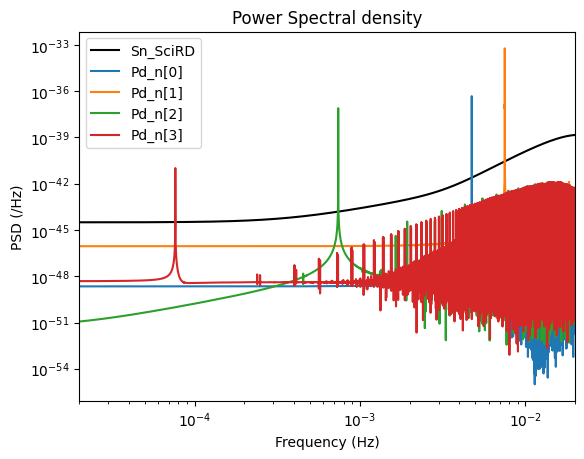

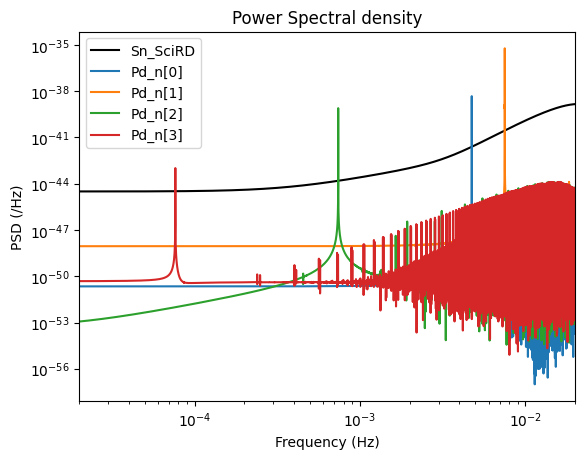

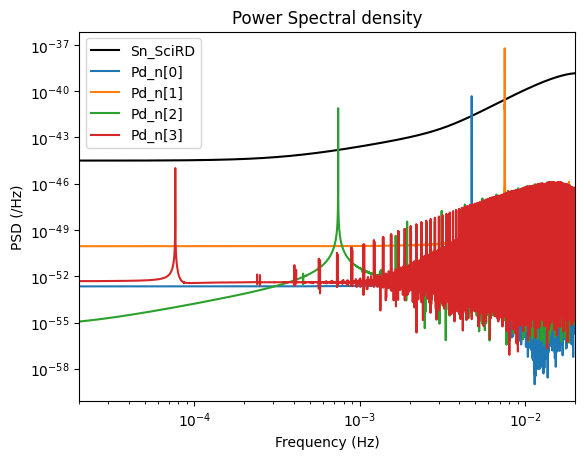

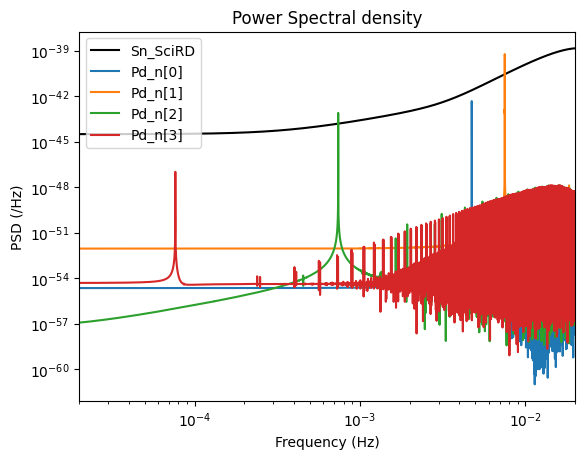

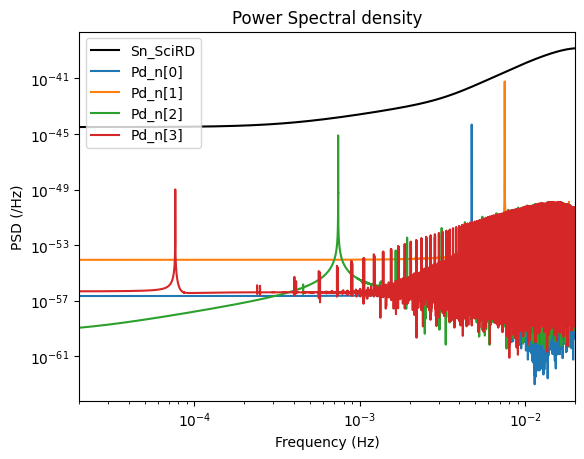

In [68]:
for i,d in zip(range(p),range(p)):
    plt.figure()
    plt.loglog(f[1:],PSD_sciRD_X2usb[i][:], label='Sn_SciRD',c='black')
    for i,b in zip(range(p),range(4)):
        plt.loglog(f[1:],Pd_X2n_dtot[d][b][:],label='Pd_n[%i]'%i)
        #plt.psd(x=tab_X2gw_dtot[d][b],Fs=1/dt)
        #freq, psd_x2 = si.welch(ltab_X2gw_dtot[d][b], fs=1/dt, window='blackman',detrend=None)
        #plt.loglog(freq, (psd_x2),label='Pd_n[%i]'%i)
        #fr, psd = si.periodogram(tab_X2gw_dtot[d][b][1:], fs=1/dt,detrend=None)
        #plt.loglog(fr, psd,label='Pd_n[%i]'%i)
    plt.legend()
    plt.xlim([2e-5,2e-2])
    plt.title('Power Spectral density')
    plt.ylabel('PSD (/Hz)')
    plt.xlabel('Frequency (Hz)')

